# Machine Learning Workshop 

## Predicting Used Car Price

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read CSV File

In [2]:
df = pd.read_csv("CAR DETAILS.csv")

In [3]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

### Check correlation between the parameters

In [7]:
df.corr()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


<AxesSubplot:>

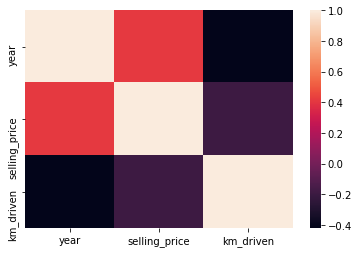

In [8]:
sns.heatmap(df.corr())

In [9]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [10]:
print(df['seller_type'].unique())
print(df['fuel'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [11]:
df.owner.replace(to_replace=['First Owner', 'Second Owner', 'Third Owner','Fourth & Above Owner','Test Drive Car'], value=[1,2,3,4,0],inplace=True)

In [12]:
print(df['owner'].unique())

[1 2 4 3 0]


In [13]:
df['Current Year'] = 2020

In [14]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Current Year
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,1,2020
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,1,2020
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,1,2020
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,1,2020
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,2,2020


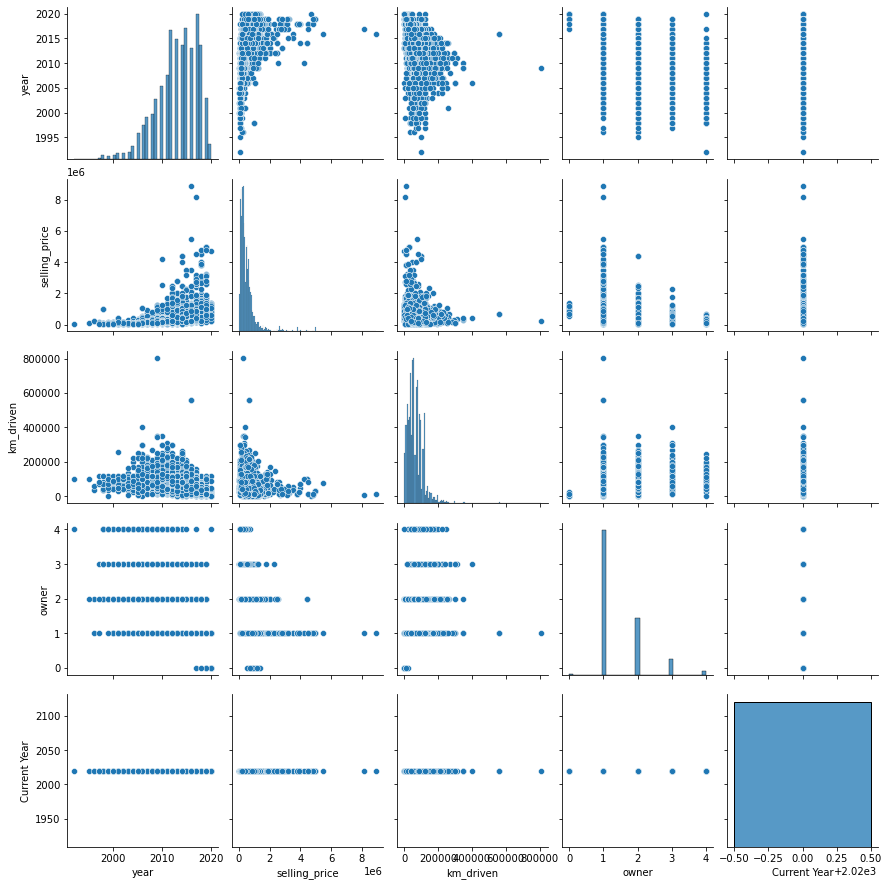

In [15]:
sns.pairplot(df)

In [16]:
df['Total Year'] = df['Current Year']-df['year']

In [17]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Current Year,Total Year
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,1,2020,13
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,1,2020,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,1,2020,8
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,1,2020,3
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,2,2020,6


In [18]:
df.drop(['year','Current Year','name'],axis=1, inplace=True)

In [19]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,Total Year
0,60000,70000,Petrol,Individual,Manual,1,13
1,135000,50000,Petrol,Individual,Manual,1,13
2,600000,100000,Diesel,Individual,Manual,1,8
3,250000,46000,Petrol,Individual,Manual,1,3
4,450000,141000,Diesel,Individual,Manual,2,6


In [20]:
df = pd.get_dummies(df,drop_first=True)

In [21]:
df.head()

,selling_price,km_driven,owner,Total Year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,60000,70000,1,13,0,0,0,1,1,0,1
1,135000,50000,1,13,0,0,0,1,1,0,1
2,600000,100000,1,8,1,0,0,0,1,0,1
3,250000,46000,1,3,0,0,0,1,1,0,1
4,450000,141000,2,6,1,0,0,0,1,0,1


In [22]:
df['selling_price']=df['selling_price']/100000

In [23]:
df.head()

,selling_price,km_driven,owner,Total Year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,0.60,70000,1,13,0,0,0,1,1,0,1
1,1.35,50000,1,13,0,0,0,1,1,0,1
2,6.00,100000,1,8,1,0,0,0,1,0,1
3,2.50,46000,1,3,0,0,0,1,1,0,1
4,4.50,141000,2,6,1,0,0,0,1,0,1


In [24]:
X = df.drop(['selling_price'],axis=1)
y = df['selling_price']

### Feature Importance

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\shbhs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [26]:
print(model.feature_importances_)

[2.49513473e-01 3.15124212e-02 2.43227102e-01 1.28964481e-01
 6.27718130e-05 2.32113530e-05 2.47021158e-04 4.50068066e-02
 8.61605148e-03 2.92826660e-01]


### Plot graph of feature importances for better visualization

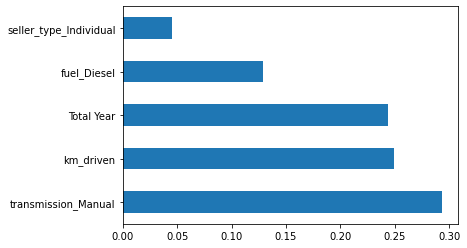

In [27]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
regressor=RandomForestRegressor()

 ### Randomized Search CV

In [31]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

### Create the random grid

In [34]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


### Use the random grid to search for best hyperparameters
### First create the base model to tune

In [35]:
rf = RandomForestRegressor()

### Random search of parameters, using 3 fold cross validation, 
### Search across 100 different combinations

In [36]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [37]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished
C:\Users\shbhs\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [38]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [39]:
rf_random.best_score_

-12.850808574888138

In [40]:
predictions=rf_random.predict(X_test)

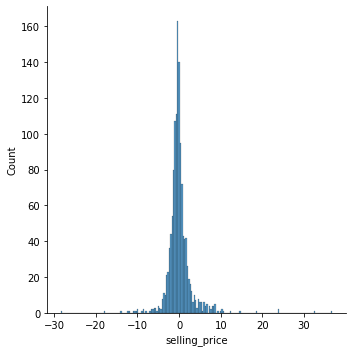

In [41]:
sns.displot(y_test-predictions)

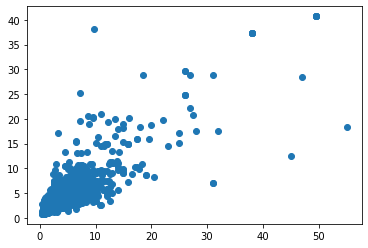

In [42]:
plt.scatter(y_test,predictions)

In [43]:
from sklearn import metrics

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.6913882602207757
MSE: 9.878376143200045
RMSE: 3.142988409650924
